### Import necessary modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd


#df_original = vv.dataset_modelling_version(iteration_code="0001_20220620")
#df_original = vv.dataset_modelling_version(iteration_code="0012_20220704")
df = vv.dataset_modelling_version(iteration_code="0013_20220704")
print(df.shape)
df.head(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:350: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 17534/42614/37063/37535/16764 ==> 17534/33082/32879/32887/16764
type <class 'pandas.core.indexes.base.Index'>
Index(['Price', 'location.latitude', 'location.longitude',
       'distance_to_any_train', 'bedrooms_model', 'bathrooms_model',
       'analyticsProperty.imageCount', 'analyticsProperty.added',
       'floorplan_count', 'borough_name_Barking and Dagenham',
       'borough_name_Barnet', 'borough_name_Bexley',
       'borough_name_City of London', 'borough_name_Croydon',
       'borough_name_Ealing', 'borough_name_Enfield', 'borough_name_Greenwich',
       'borough_name_Havering', 'borough_name_Hillingdon',
       'borough_name_Hounslow', 'borough_name_Islington',
       'borough_name_Kensington and Chelsea',
       'borough_name_Kingston upon Thames', 'borough_name_Lambeth',
       'borough_name_Lewisham', 'borough_name_Merton', 'borough_name_Newham',
       'borough_name_Redbridge', 'borough_name_Sutton',
       'borough_name_Tower Hamlets', 'borough_name_Wal

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
124711385,595000.0,51.545403,0.010827,0.2,3.0,2.0,15.0,20220706.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
85192623,100000.0,51.521889,0.021028,0.7,NaN,1.0,5.0,20220505.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
84048834,106250.0,51.50874,0.018970,0.1,2.0,1.0,21.0,20220223.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124730183,459500.0,51.51931,0.047120,0.6,3.0,2.0,15.0,20220706.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
122681411,200000.0,51.54933,0.027690,0.2,1.0,1.0,14.0,20220421.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
121401611,200000.0,51.545782,0.044006,0.2,1.0,1.0,10.0,20220322.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
124528181,200000.0,51.512,0.043328,0.3,1.0,1.0,5.0,20220630.0,4.0,0,...,0,0,0,0,0,0,0,0,0,1
121061348,200000.0,51.531232,0.044065,1.9,1.0,1.0,4.0,20220314.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
121116221,429950.0,51.419005,-0.193968,0.3,1.0,2.0,6.0,20220315.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0


### Get the property listings data and store in a dataframe

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15488 entries, 124711385 to 114438299
Data columns (total 88 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Price                                              15488 non-null  float64
 1   location.latitude                                  15488 non-null  object 
 2   location.longitude                                 15488 non-null  float64
 3   distance_to_any_train                              15488 non-null  float64
 4   bedrooms_model                                     14834 non-null  float64
 5   bathrooms_model                                    15488 non-null  float64
 6   analyticsProperty.imageCount                       15486 non-null  float64
 7   analyticsProperty.added                            15486 non-null  float64
 8   floorplan_count                                    15488 non-null  float64
 9  

In [3]:
df[
    #['Address', 'analyticsProperty.maxSizeAc', 'analyticsProperty.maxSizeFt', 'analyticsProperty.minSizeAc', 'analyticsProperty.minSizeFt', 'date_scraped', 'date_scraped_model',     'date_scraped_model', 'date_scraped_meta']]
    #df['location.latitude'].notnull()]
    df['location.latitude'].isnull()]

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [4]:
#df.loc[123715148]

In [5]:
print(df.shape)
df["location.latitude"] = pd.to_numeric(df["location.latitude"], 'coerce').dropna().astype(int)
df["analyticsProperty.imageCount"] = pd.to_numeric(df["analyticsProperty.imageCount"], 'coerce').dropna().astype(int)
df["analyticsProperty.added"] = pd.to_numeric(df["analyticsProperty.added"], 'coerce').dropna().astype(int)
print(df.shape)
df.info()

(15488, 88)
(15488, 88)
<class 'pandas.core.frame.DataFrame'>
Index: 15488 entries, 124711385 to 114438299
Data columns (total 88 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Price                                              15488 non-null  float64
 1   location.latitude                                  15487 non-null  float64
 2   location.longitude                                 15488 non-null  float64
 3   distance_to_any_train                              15488 non-null  float64
 4   bedrooms_model                                     14834 non-null  float64
 5   bathrooms_model                                    15488 non-null  float64
 6   analyticsProperty.imageCount                       15486 non-null  float64
 7   analyticsProperty.added                            15486 non-null  float64
 8   floorplan_count                                    1548

In [6]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
85192623,100000.0,51.0,0.021028,0.7,NaN,1.0,5.0,20220505.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
124253501,262000.0,51.0,0.047120,0.6,NaN,1.0,11.0,20220623.0,14.0,0,...,0,0,0,0,0,0,0,0,1,0
124299821,295000.0,51.0,-0.211203,0.2,NaN,1.0,13.0,20220624.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0
121372325,265000.0,51.0,-0.211417,0.2,NaN,1.0,7.0,20220322.0,4.0,0,...,0,1,0,0,0,0,0,0,0,1
85329960,250000.0,51.0,-0.189994,0.2,NaN,1.0,10.0,20220517.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0
122726723,175000.0,51.0,-0.226727,0.2,NaN,1.0,3.0,20220422.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0
120792881,175000.0,51.0,-0.177899,0.4,NaN,1.0,8.0,20220308.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
71814777,185000.0,51.0,-0.177832,0.4,NaN,1.0,6.0,20200713.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
122090075,200000.0,51.0,-0.226727,0.2,NaN,1.0,7.0,20220407.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0


In [7]:
median_bathroom = df['bathrooms_model'].median()
print(median_bathroom)

df['bathrooms_model'].fillna(median_bathroom, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

1.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
85192623,100000.0,51.0,0.021028,0.7,NaN,1.0,5.0,20220505.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
124253501,262000.0,51.0,0.047120,0.6,NaN,1.0,11.0,20220623.0,14.0,0,...,0,0,0,0,0,0,0,0,1,0
124299821,295000.0,51.0,-0.211203,0.2,NaN,1.0,13.0,20220624.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0
121372325,265000.0,51.0,-0.211417,0.2,NaN,1.0,7.0,20220322.0,4.0,0,...,0,1,0,0,0,0,0,0,0,1
85329960,250000.0,51.0,-0.189994,0.2,NaN,1.0,10.0,20220517.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0
122726723,175000.0,51.0,-0.226727,0.2,NaN,1.0,3.0,20220422.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0
120792881,175000.0,51.0,-0.177899,0.4,NaN,1.0,8.0,20220308.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
71814777,185000.0,51.0,-0.177832,0.4,NaN,1.0,6.0,20200713.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
122090075,200000.0,51.0,-0.226727,0.2,NaN,1.0,7.0,20220407.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0


In [8]:
median_bedrooms = df['bedrooms_model'].median()
print(median_bedrooms)

df['bedrooms_model'].fillna(median_bedrooms, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

2.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121433102,350000.0,51.0,-0.108840,0.1,2.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,0,1,0
123399767,585000.0,51.0,-0.043220,1.1,3.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
118737587,600000.0,NaN,51.476357,0.6,4.0,2.0,9.0,20220114.0,16.0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
median_imageCount = df['analyticsProperty.imageCount'].median()
print(median_imageCount)

df['analyticsProperty.imageCount'].fillna(median_imageCount, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

12.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121433102,350000.0,51.0,-0.108840,0.1,2.0,1.0,12.0,NaN,4.0,0,...,0,0,0,0,0,0,0,0,1,0
123399767,585000.0,51.0,-0.043220,1.1,3.0,1.0,12.0,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
118737587,600000.0,NaN,51.476357,0.6,4.0,2.0,9.0,20220114.0,16.0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
median_added = df['analyticsProperty.added'].median()
print(median_added)

df['analyticsProperty.added'].fillna(median_added, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

20220404.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
118737587,600000.0,NaN,51.476357,0.6,4.0,2.0,9.0,20220114.0,16.0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
#df = df['Price'].dropna()
#sample_incomplete_rows = df[df.isnull().any(axis=1)].copy() #.head()
#sample_incomplete_rows
df = df.dropna(subset="Price")
df = df.dropna(subset=["analyticsProperty.added", 'location.latitude', 'location.longitude'])

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [12]:
df.isnull().any() == True

Price                                                False
location.latitude                                    False
location.longitude                                   False
distance_to_any_train                                False
bedrooms_model                                       False
bathrooms_model                                      False
analyticsProperty.imageCount                         False
analyticsProperty.added                              False
floorplan_count                                      False
borough_name_Barking and Dagenham                    False
borough_name_Barnet                                  False
borough_name_Bexley                                  False
borough_name_City of London                          False
borough_name_Croydon                                 False
borough_name_Ealing                                  False
borough_name_Enfield                                 False
borough_name_Greenwich                               Fal

## Prepare data for training the model

In [13]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

## Build a Random Forest model

In [14]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

## Evaluate the model on the test data

In [15]:
print(type(y_test.values))
print(type(y_pred))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
metrics.mean_squared_error(y_test.values, y_pred)

4502436812.9286785

##

In [17]:
#metrics.accuracy_score(y_test.values, y_pred)
regressor.score(X_test, y_test)
#regressor.score(X, y)

0.6482595480128615

In [18]:
sorted(zip(y_test,y_pred),reverse=True)

[(600000.0, 600000.0),
 (600000.0, 599250.0),
 (600000.0, 589323.475),
 (600000.0, 588610.25),
 (600000.0, 585187.725),
 (600000.0, 582189.225),
 (600000.0, 581737.5),
 (600000.0, 576699.165),
 (600000.0, 575669.75),
 (600000.0, 571774.75),
 (600000.0, 571065.0),
 (600000.0, 560099.95),
 (600000.0, 557019.75),
 (600000.0, 555031.3928571428),
 (600000.0, 552111.375),
 (600000.0, 551674.745),
 (600000.0, 548999.3),
 (600000.0, 548074.64),
 (600000.0, 544996.5),
 (600000.0, 544006.735),
 (600000.0, 541929.0),
 (600000.0, 538666.875),
 (600000.0, 536074.175),
 (600000.0, 533289.245),
 (600000.0, 498871.41428571433),
 (600000.0, 487386.75),
 (600000.0, 477866.425),
 (600000.0, 475453.05833333335),
 (600000.0, 456676.055),
 (600000.0, 453584.25),
 (600000.0, 443601.885),
 (599999.0, 485799.865),
 (599995.0, 542259.275),
 (599950.0, 388850.9235714286),
 (597800.0, 479997.5),
 (595000.0, 531215.495),
 (595000.0, 523125.0),
 (595000.0, 522192.16),
 (595000.0, 466514.25),
 (595000.0, 441194.0),


In [19]:
y_pred = regressor.predict(X_test)
true_vs_pred = pd.DataFrame(sorted(zip(y_test, y_pred), reverse=True),columns=['actual','predicted'])

true_vs_pred

# TODO - Look at the residuals and identify why the largest ones are so large

,actual,predicted
0,600000.0,600000.000000
1,600000.0,594199.500000
2,600000.0,593749.750000
3,600000.0,589100.250000
4,600000.0,582923.325000
5,600000.0,578899.750000
6,600000.0,575999.500000
7,600000.0,575973.075000
8,600000.0,567225.000000
9,600000.0,560049.950000


In [20]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

3494178699.511707

<AxesSubplot:xlabel='actual', ylabel='predicted'>

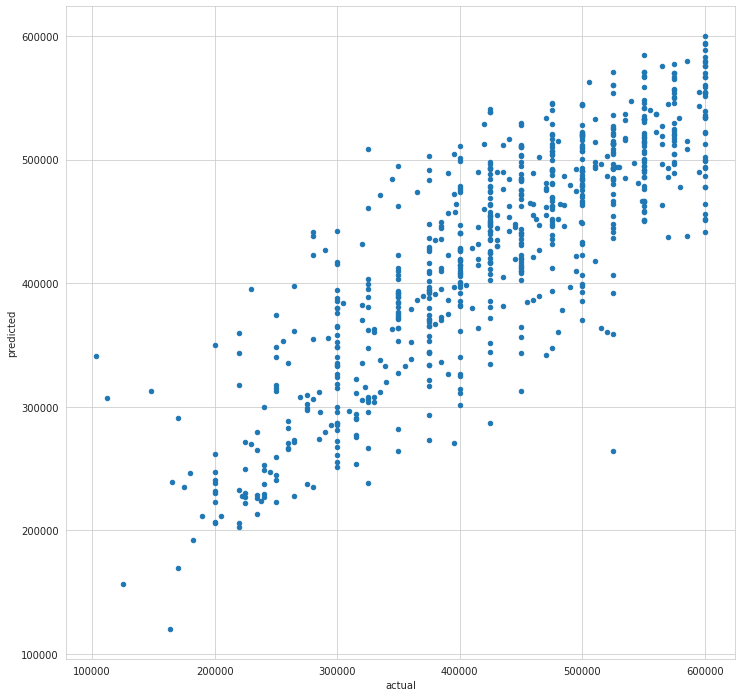

In [21]:
true_vs_pred.plot(kind='scatter',x=0,y=1,figsize=(12,12))

NameError: name 'regressor' is not defined